In [4]:
from baynes.model_utils import *
from baynes.plotter import FitPlotter
from cmdstanpy import CmdStanModel
from baynes.analysis import standard_analysis
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [5]:
stan_file= get_stan_file("lorentzians.stan")
model = CmdStanModel(stan_file=stan_file,
                     **get_compiler_kwargs())

Found .stan file  /home/pietro/work/TESI/baynes/stan/models/lorentzians/lorentzians.stan


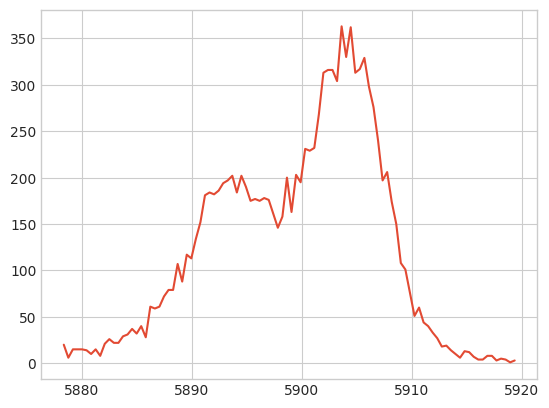

In [15]:
datContent = [i.strip().split() for i in open("Fe_cal_7.dat").readlines()]
data = [float(d) for d in datContent[0]]
counts, edges = np.histogram(data, 100)
centers = np.array([(edges[i]+edges[i+1])/2 for i in range(len(edges)-1)])
plt.plot(centers, counts)

22:40:47 - cmdstanpy - INFO - CmdStan start processing
22:40:47 - cmdstanpy - INFO - CmdStan start processing



 ---- Sampling the priors ---- 



22:40:47 - cmdstanpy - INFO - CmdStan done processing



 ---- Prior predictive check ---- 



/home/pietro/.virtualenvs/baynesenv/lib/python3.10/site-packages/baynes/plotter.py:417: RuntimeWarning: divide by zero encountered in divide
  ax1.fill_between(np.arange(len(events)), (lo-events)/np.sqrt(events), (hi-events)/np.sqrt(events),


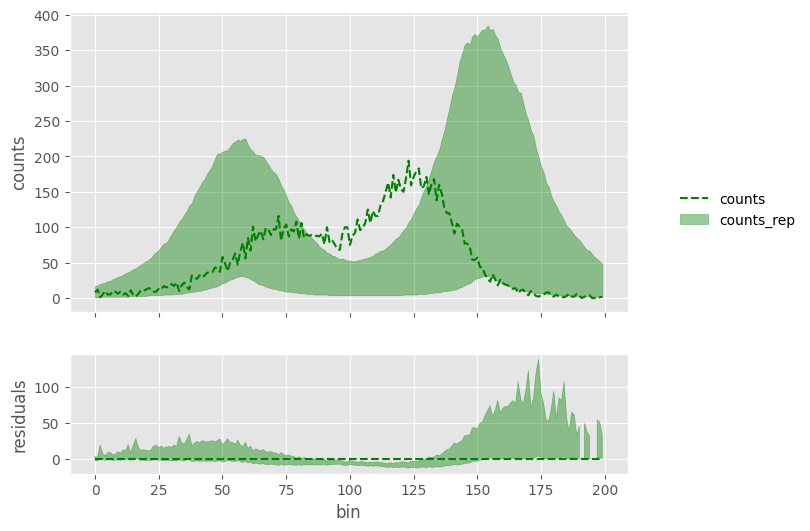


 ---- Prior distribustions ---- 



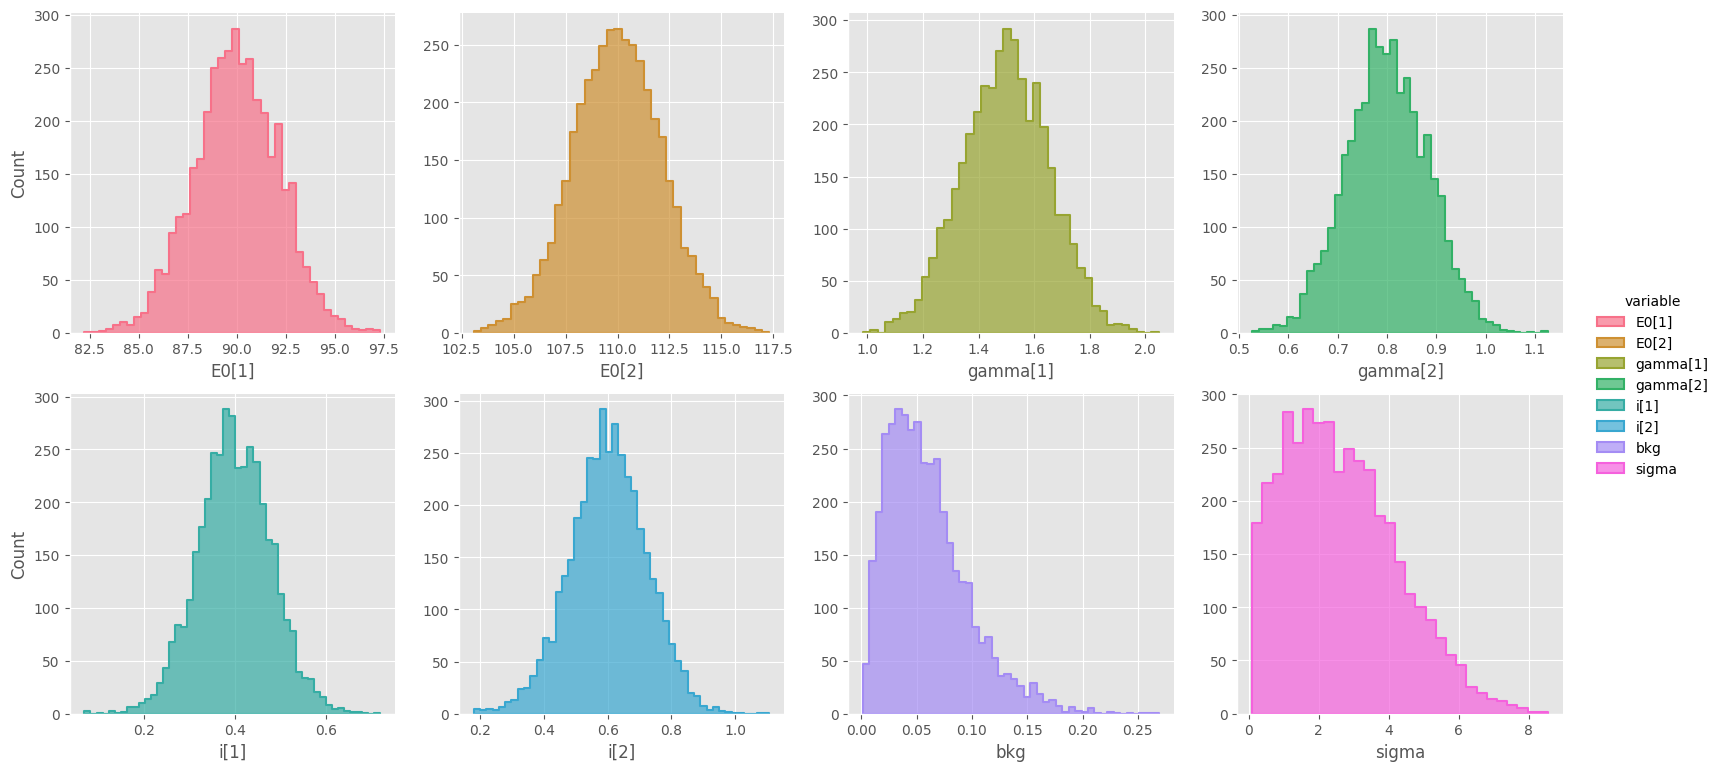

22:40:48 - cmdstanpy - INFO - CmdStan start processing



 ---- Fitting the model ---- 



chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

chain 5 |          | 00:00 Status

chain 6 |          | 00:00 Status

chain 7 |          | 00:00 Status

chain 8 |          | 00:00 Status

22:41:05 - cmdstanpy - INFO - CmdStan done processing.
22:41:05 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: poisson_lpmf: Rate parameter[1] is -nan, but must be nonnegative! (in '/home/pietro/work/TESI/baynes/stan/models/lorentzians/lorentzians.stan', line 45, column 4 to column 86)
	Exception: poisson_lpmf: Rate parameter[1] is -nan, but must be nonnegative! (in '/home/pietro/work/TESI/baynes/stan/models/lorentzians/lorentzians.stan', line 45, column 4 to column 86)
	Exception: poisson_lpmf: Rate parameter[1] is -nan, but must be nonnegative! (in '/home/pietro/work/TESI/baynes/stan/models/lorentzians/lorentzians.stan', line 45, column 4 to column 86)
	Exception: poisson_lpmf: Rate parameter[1] is -nan, but must be nonnegative! (in '/home/pietro/work/TESI/baynes/stan/models/lorentzians/lorentzians.stan', line 45, column 4 to column 86)
	Exception: poisson_lpmf: Rate parameter[1] is -nan, but must be nonnegative! (in '/home/pietro/work/TESI/baynes/stan/models/lor


Processing csv files: /tmp/tmp59ko5vlt/lorentziansu387wtmt/lorentzians-20230723224048_1.csvWarning: non-fatal error reading adaptation data
, /tmp/tmp59ko5vlt/lorentziansu387wtmt/lorentzians-20230723224048_2.csvWarning: non-fatal error reading adaptation data
, /tmp/tmp59ko5vlt/lorentziansu387wtmt/lorentzians-20230723224048_3.csvWarning: non-fatal error reading adaptation data
, /tmp/tmp59ko5vlt/lorentziansu387wtmt/lorentzians-20230723224048_4.csvWarning: non-fatal error reading adaptation data
, /tmp/tmp59ko5vlt/lorentziansu387wtmt/lorentzians-20230723224048_5.csvWarning: non-fatal error reading adaptation data
, /tmp/tmp59ko5vlt/lorentziansu387wtmt/lorentzians-20230723224048_6.csvWarning: non-fatal error reading adaptation data
, /tmp/tmp59ko5vlt/lorentziansu387wtmt/lorentzians-20230723224048_7.csvWarning: non-fatal error reading adaptation data
, /tmp/tmp59ko5vlt/lorentziansu387wtmt/lorentzians-20230723224048_8.csvWarning: non-fatal error reading adaptation data


Checking sampler 

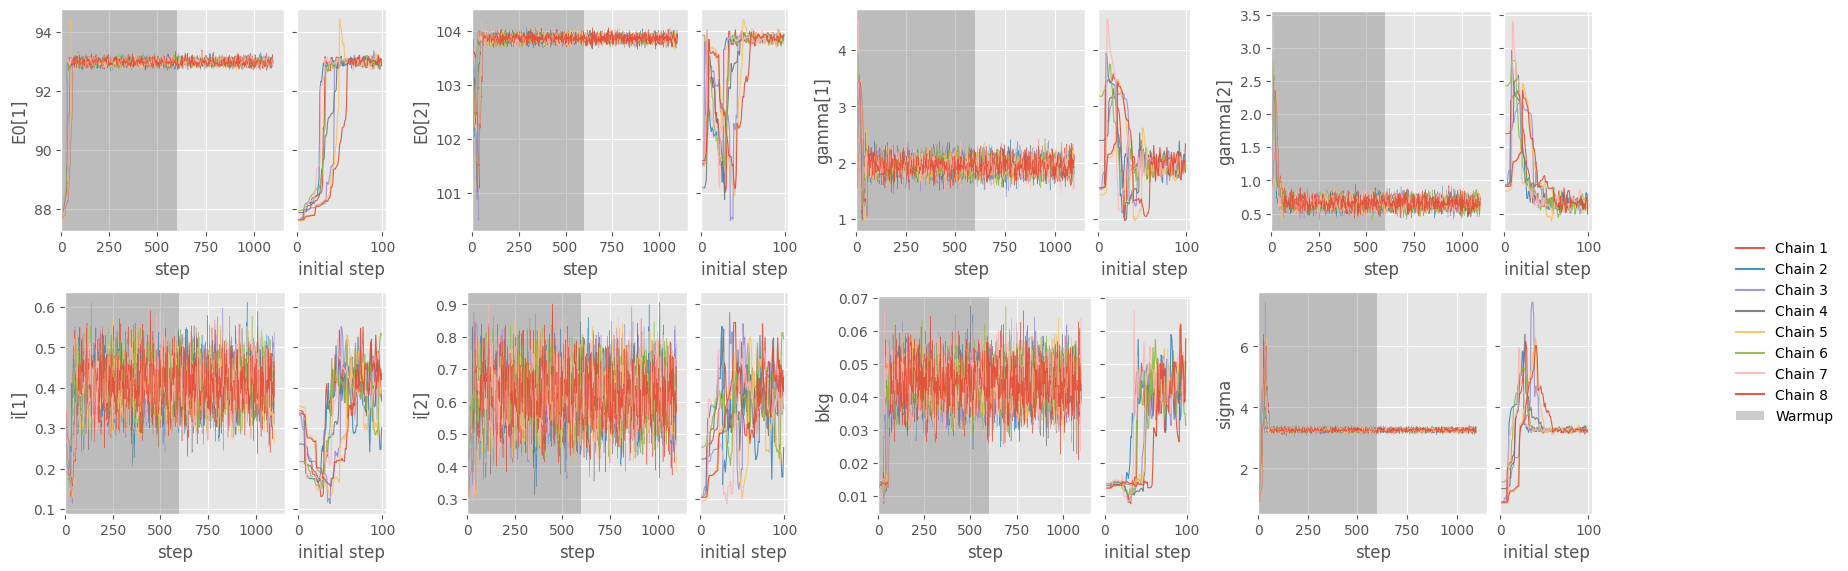


 ---- Prior predictive check ---- 



/home/pietro/.virtualenvs/baynesenv/lib/python3.10/site-packages/baynes/plotter.py:417: RuntimeWarning: divide by zero encountered in divide
  ax1.fill_between(np.arange(len(events)), (lo-events)/np.sqrt(events), (hi-events)/np.sqrt(events),


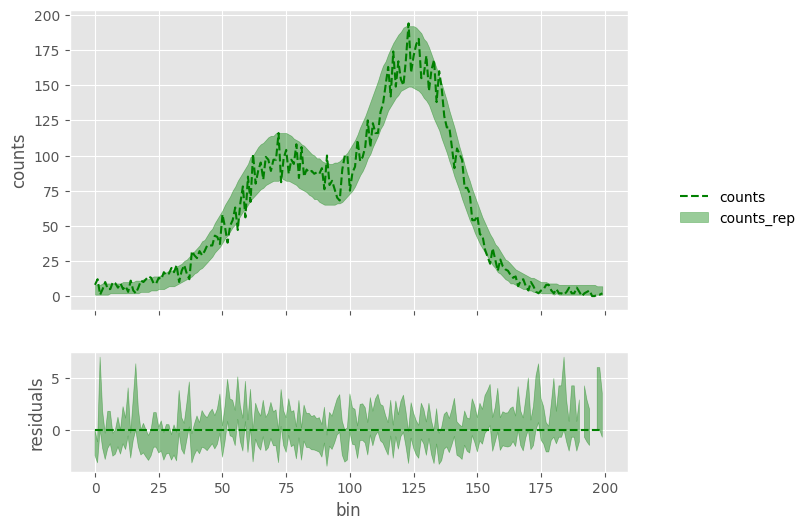


 ---- Posterior distribustions ---- 



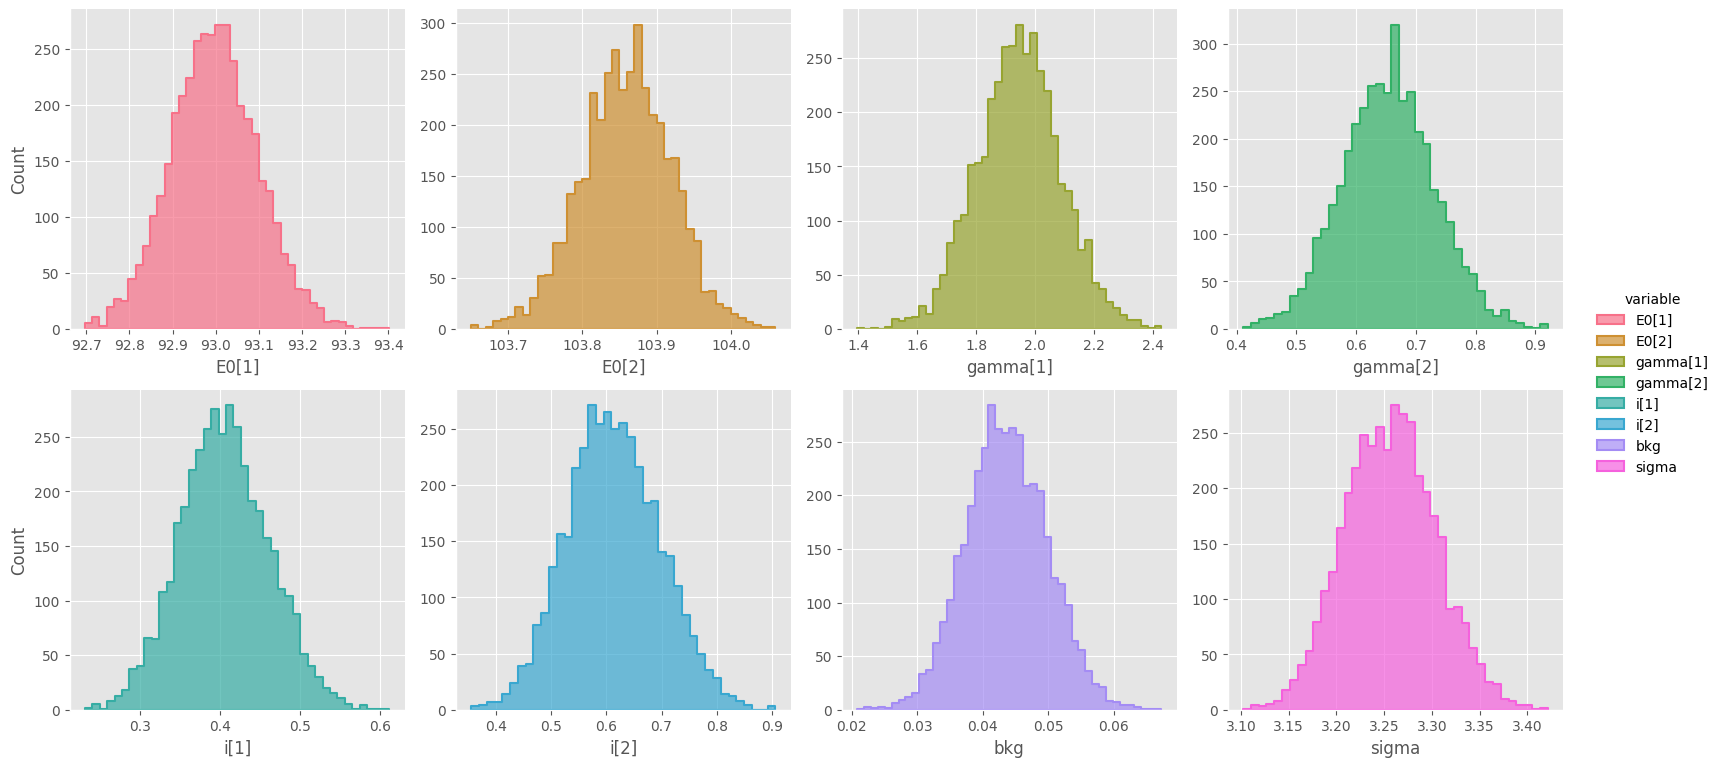


 ---- Prior vs posterior comparison ---- 



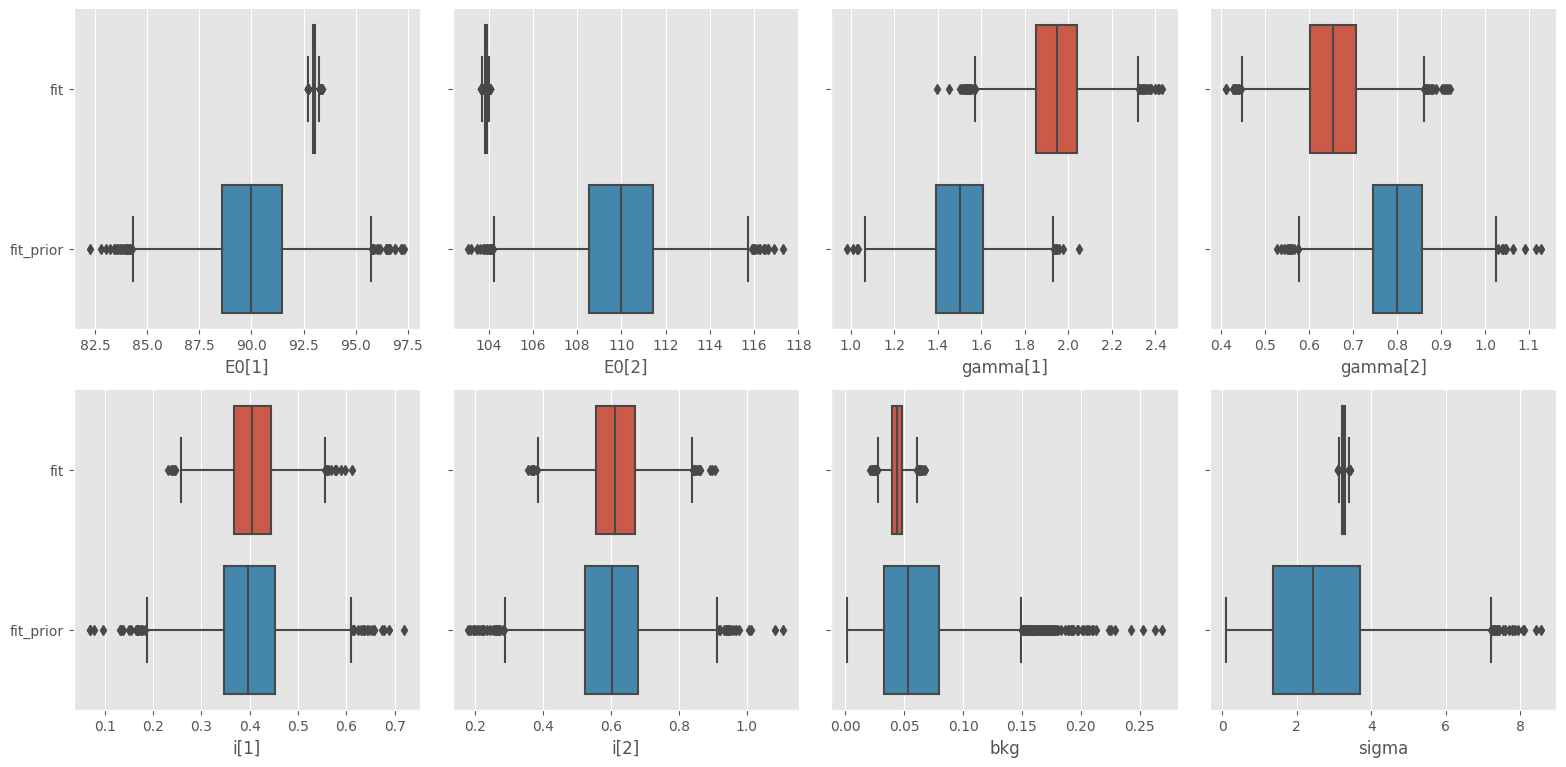

In [7]:
shift = 5800
data={"N_bins": len(counts), 
      'N_peaks': 2,
      'counts': counts.tolist(), 
      'x': edges-shift,
      'N_ev': sum(counts), 
      'p_FWHM': 5, 
      'p_gamma': [1.5,0.8], 
      'p_E0': [5890.-shift, 5910.-shift],
      'p_i': [0.4,0.6],
      'prior': 1}

sampler_kwargs={
    'chains': 8,
    'iter_warmup': 600,
    'iter_sampling': 500,
    'save_warmup': True, 
    'adapt_delta': 0.85,
    'max_treedepth': 10,
    'threads_per_chain':2,
}
p = FitPlotter(col_wrap=4)
fit = standard_analysis(model, data, p, sampler_kwargs=sampler_kwargs)

In [11]:
stan_file= get_stan_file("poisGP.stan")
model = CmdStanModel(stan_file=stan_file,
                     **get_compiler_kwargs())

22:45:11 - cmdstanpy - INFO - compiling stan file /home/pietro/work/TESI/baynes/stan/models/gaussian processes/poisGP.stan to exe file /home/pietro/work/TESI/baynes/stan/models/gaussian processes/poisGP


Found .stan file  /home/pietro/work/TESI/baynes/stan/models/gaussian processes/poisGP.stan


22:45:24 - cmdstanpy - INFO - compiled model executable: /home/pietro/work/TESI/baynes/stan/models/gaussian processes/poisGP


22:48:36 - cmdstanpy - INFO - CmdStan start processing
22:48:36 - cmdstanpy - INFO - CmdStan start processing



 ---- Sampling the priors ---- 



22:48:40 - cmdstanpy - INFO - CmdStan done processing
22:48:40 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: cholesky_decompose: Matrix m is not positive definite (in '/tmp/tmp34_g1u3a/tmpfxw7gi2a.stan', line 25, column 4 to column 32)
	Exception: cholesky_decompose: Matrix m is not positive definite (in '/tmp/tmp34_g1u3a/tmpfxw7gi2a.stan', line 25, column 4 to column 32)
	Exception: cholesky_decompose: Matrix m is not positive definite (in '/tmp/tmp34_g1u3a/tmpfxw7gi2a.stan', line 25, column 4 to column 32)
	Exception: cholesky_decompose: Matrix m is not positive definite (in '/tmp/tmp34_g1u3a/tmpfxw7gi2a.stan', line 25, column 4 to column 32)
	Exception: cholesky_decompose: Matrix m is not positive definite (in '/tmp/tmp34_g1u3a/tmpfxw7gi2a.stan', line 25, column 4 to column 32)
	Exception: cholesky_decompose: Matrix m is not positive definite (in '/tmp/tmp34_g1u3a/tmpfxw7gi2a.stan', line 25, column 4 to column 32)
	Exception: cholesky_decompose: Matrix m is not


 ---- Prior predictive check ---- 



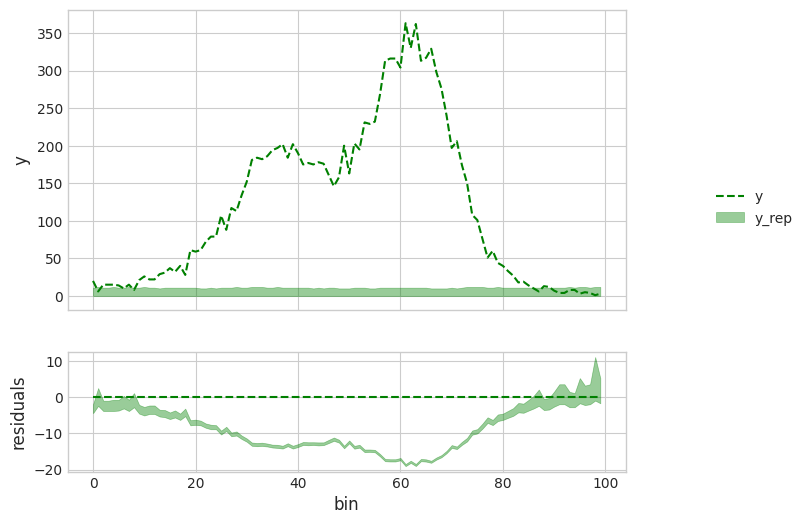


 ---- Prior distribustions ---- 



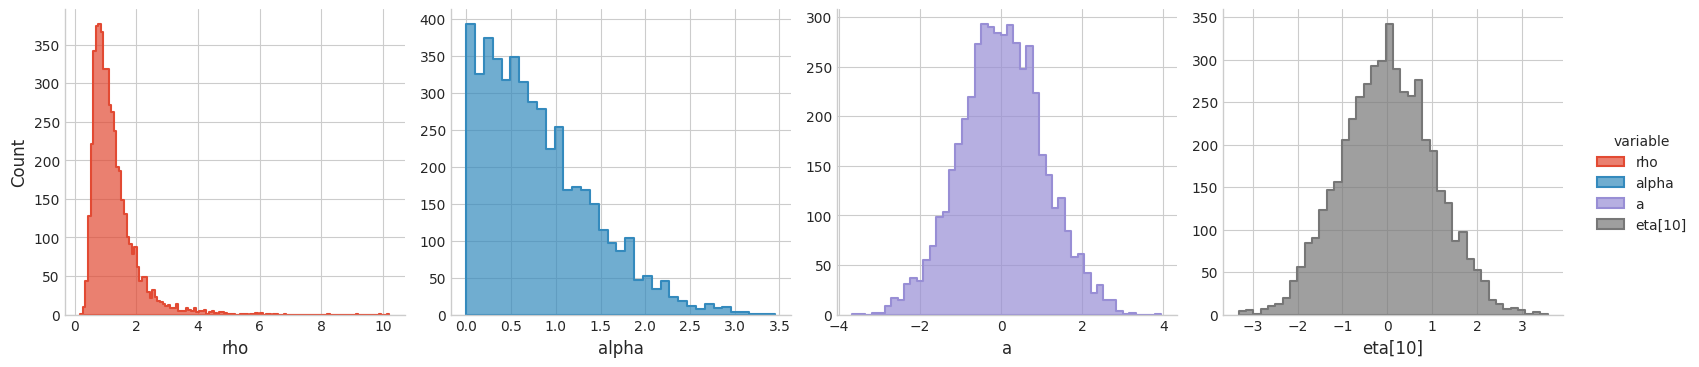

22:48:42 - cmdstanpy - INFO - CmdStan start processing



 ---- Fitting the model ---- 



chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

chain 5 |          | 00:00 Status

chain 6 |          | 00:00 Status

chain 7 |          | 00:00 Status

chain 8 |          | 00:00 Status

chain 9 |          | 00:00 Status

chain 10 |          | 00:00 Status

chain 11 |          | 00:00 Status

chain 12 |          | 00:00 Status

chain 13 |          | 00:00 Status

chain 14 |          | 00:00 Status

chain 15 |          | 00:00 Status

chain 16 |          | 00:00 Status

22:53:42 - cmdstanpy - INFO - CmdStan done processing.
22:53:43 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: cholesky_decompose: A is not symmetric. A[1,2] = inf, but A[2,1] = inf (in '/tmp/tmp34_g1u3a/tmpfxw7gi2a.stan', line 25, column 4 to column 32)
	Exception: cholesky_decompose: A is not symmetric. A[1,2] = inf, but A[2,1] = inf (in '/tmp/tmp34_g1u3a/tmpfxw7gi2a.stan', line 25, column 4 to column 32)
	Exception: cholesky_decompose: A is not symmetric. A[1,2] = inf, but A[2,1] = inf (in '/tmp/tmp34_g1u3a/tmpfxw7gi2a.stan', line 25, column 4 to column 32)
	Exception: cholesky_decompose: A is not symmetric. A[1,2] = inf, but A[2,1] = inf (in '/tmp/tmp34_g1u3a/tmpfxw7gi2a.stan', line 25, column 4 to column 32)
	Exception: cholesky_decompose: A is not symmetric. A[1,2] = inf, but A[2,1] = inf (in '/tmp/tmp34_g1u3a/tmpfxw7gi2a.stan', line 25, column 4 to column 32)
	Exception: cholesky_decompose: A is not symmetric. A[1,2] = inf, but A[2,1] = inf (in '/tmp/tmp34_g


Processing csv files: /tmp/tmp59ko5vlt/poisGPgyy061hu/poisGP-20230723224842_1.csvWarning: non-fatal error reading adaptation data
, /tmp/tmp59ko5vlt/poisGPgyy061hu/poisGP-20230723224842_2.csvWarning: non-fatal error reading adaptation data
, /tmp/tmp59ko5vlt/poisGPgyy061hu/poisGP-20230723224842_3.csvWarning: non-fatal error reading adaptation data
, /tmp/tmp59ko5vlt/poisGPgyy061hu/poisGP-20230723224842_4.csvWarning: non-fatal error reading adaptation data
, /tmp/tmp59ko5vlt/poisGPgyy061hu/poisGP-20230723224842_5.csvWarning: non-fatal error reading adaptation data
, /tmp/tmp59ko5vlt/poisGPgyy061hu/poisGP-20230723224842_6.csvWarning: non-fatal error reading adaptation data
, /tmp/tmp59ko5vlt/poisGPgyy061hu/poisGP-20230723224842_7.csvWarning: non-fatal error reading adaptation data
, /tmp/tmp59ko5vlt/poisGPgyy061hu/poisGP-20230723224842_8.csvWarning: non-fatal error reading adaptation data
, /tmp/tmp59ko5vlt/poisGPgyy061hu/poisGP-20230723224842_9.csvWarning: non-fatal error reading adapt

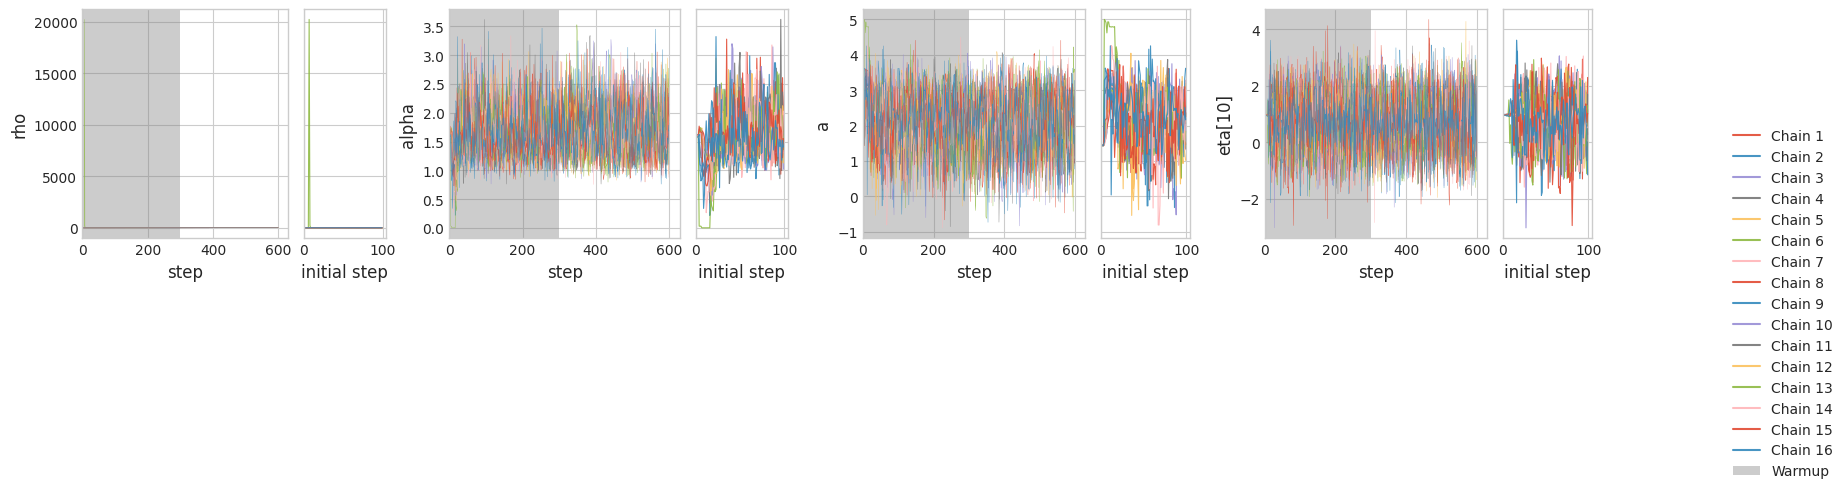


 ---- Prior predictive check ---- 



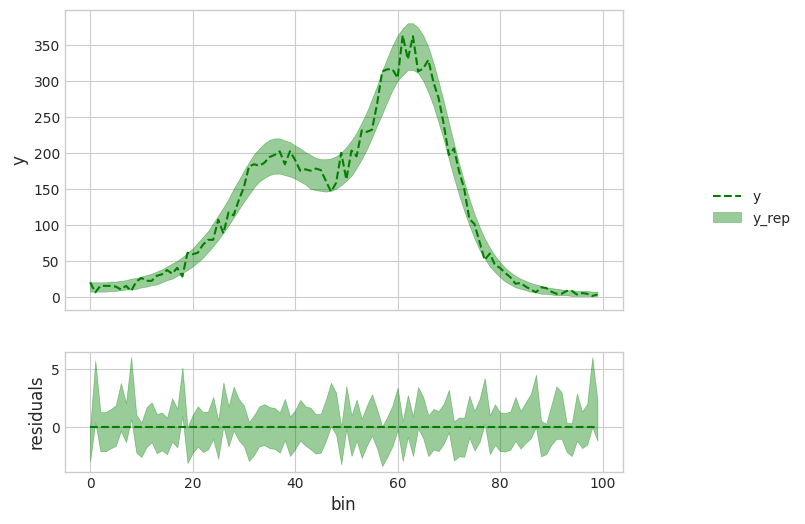


 ---- Posterior distribustions ---- 



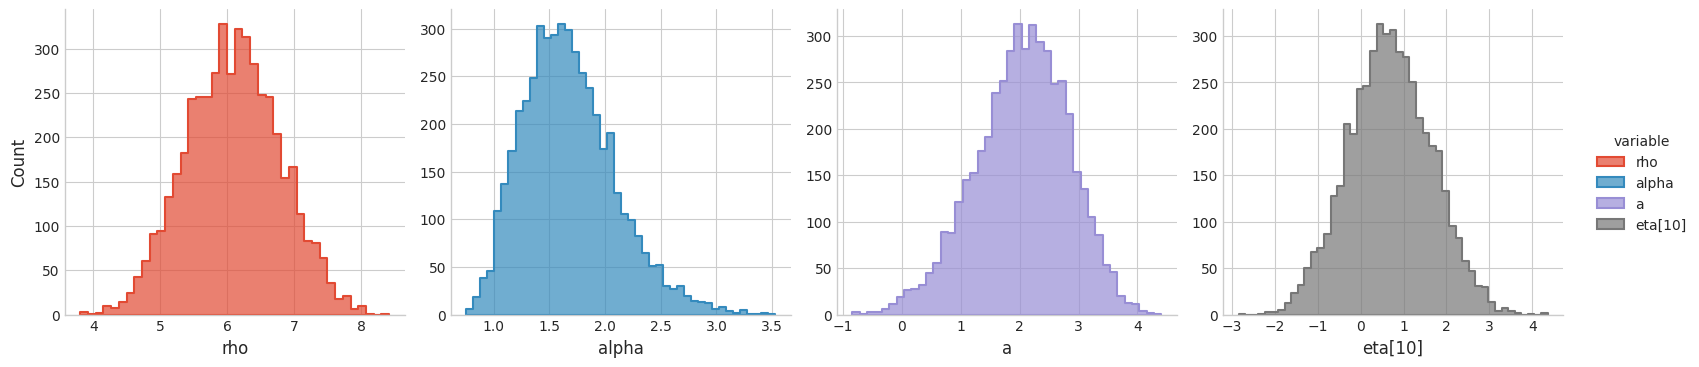


 ---- Prior vs posterior comparison ---- 



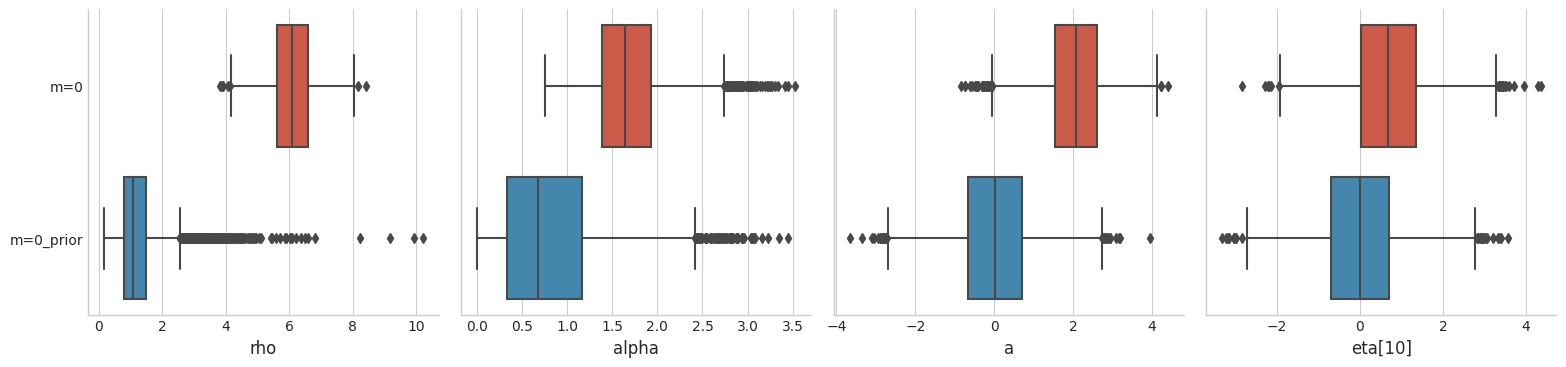

In [16]:
data = {'N': len(counts),
        'x': centers,
        'y': counts}

sampler_kwargs={
    'chains': 16,
    'iter_warmup': 300,
    'iter_sampling': 300,
    'save_warmup': True, 
    'adapt_delta': 0.9,
    'max_treedepth': 12,
    'threads_per_chain':2,
}
plot_pars=['rho', 'alpha', 'a', 'eta[10]']
fit = standard_analysis(model, data, p, sampler_kwargs, fit_title='m=0', data_key='y', rep_key='y_rep',plot_params=plot_pars)